# SALES PREDICTION USING PYTHON

CodSoft Data Science internship Task 4

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv('advertising.csv')

### Exploratory Data Analysis and Feature Engineering 

In [4]:
data.shape

(200, 4)

In [5]:
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [6]:
data.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [7]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [9]:
data.duplicated().sum()

0

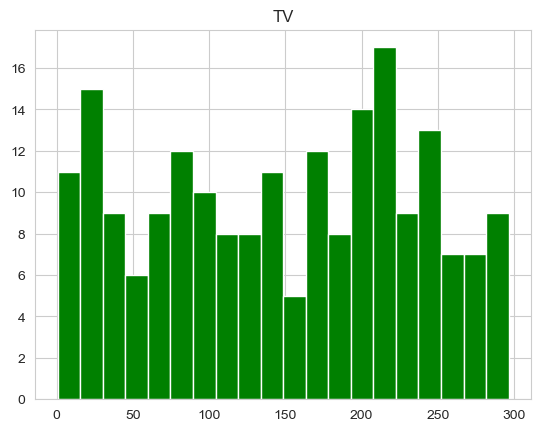

In [10]:
sns.set_style('whitegrid')
data['TV'].hist(bins=20,color='green')
plt.title('TV')
plt.show()

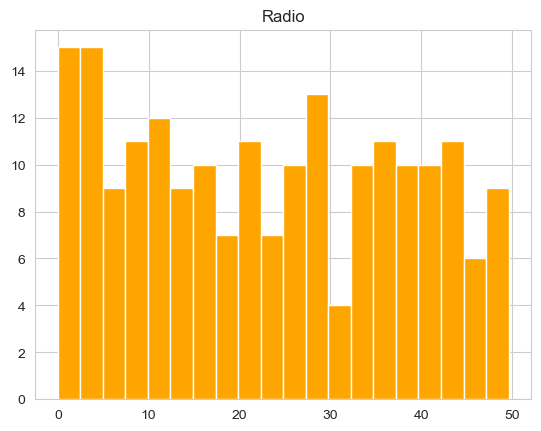

In [11]:
sns.set_style('whitegrid')
data['Radio'].hist(bins=20,color='orange')
plt.title('Radio')
plt.show()

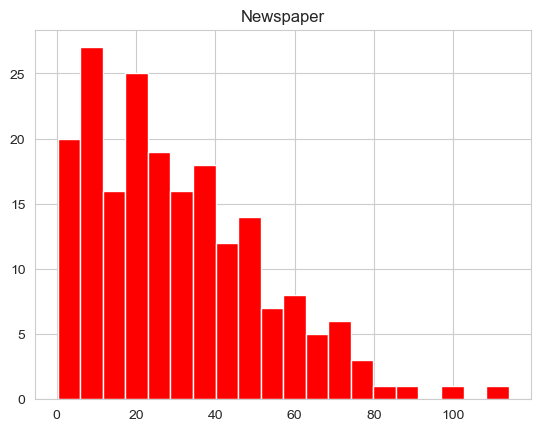

In [12]:
sns.set_style('whitegrid')
data['Newspaper'].hist(bins=20,color='red')
plt.title('Newspaper')
plt.show()

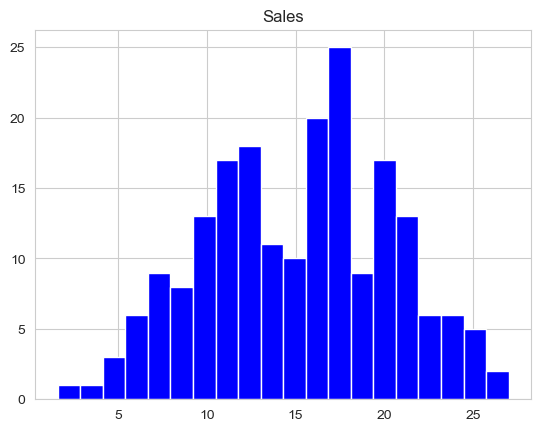

In [13]:
sns.set_style('whitegrid')
data['Sales'].hist(bins=20,color='blue')
plt.title('Sales')
plt.show()

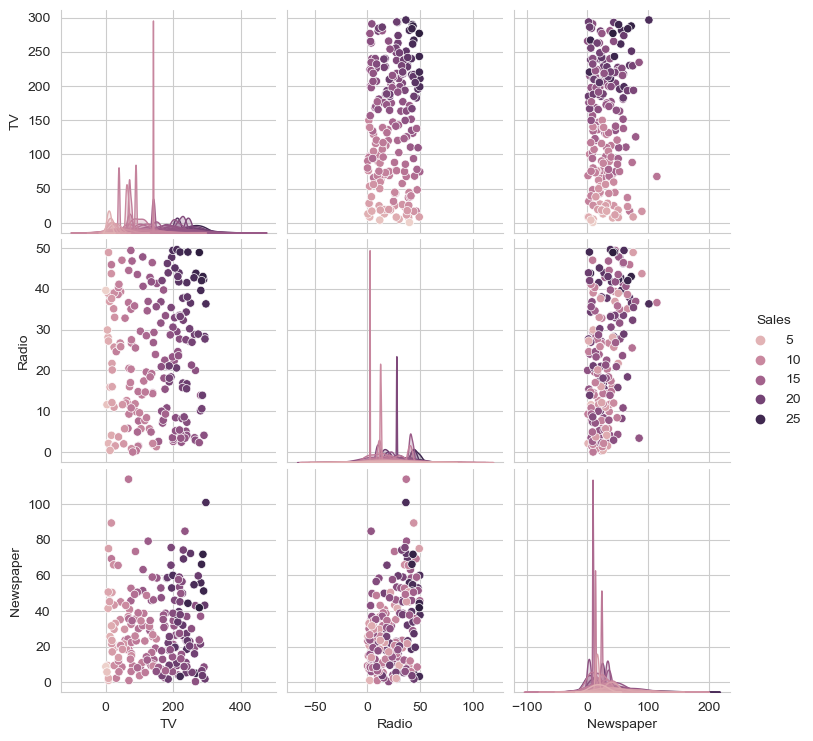

In [14]:
sns.pairplot(data,hue='Sales')
plt.show()

In [15]:
data['Sales'].max()

27.0

In [16]:
data['Sales'].min()

1.6

<Axes: xlabel='TV', ylabel='Sales'>

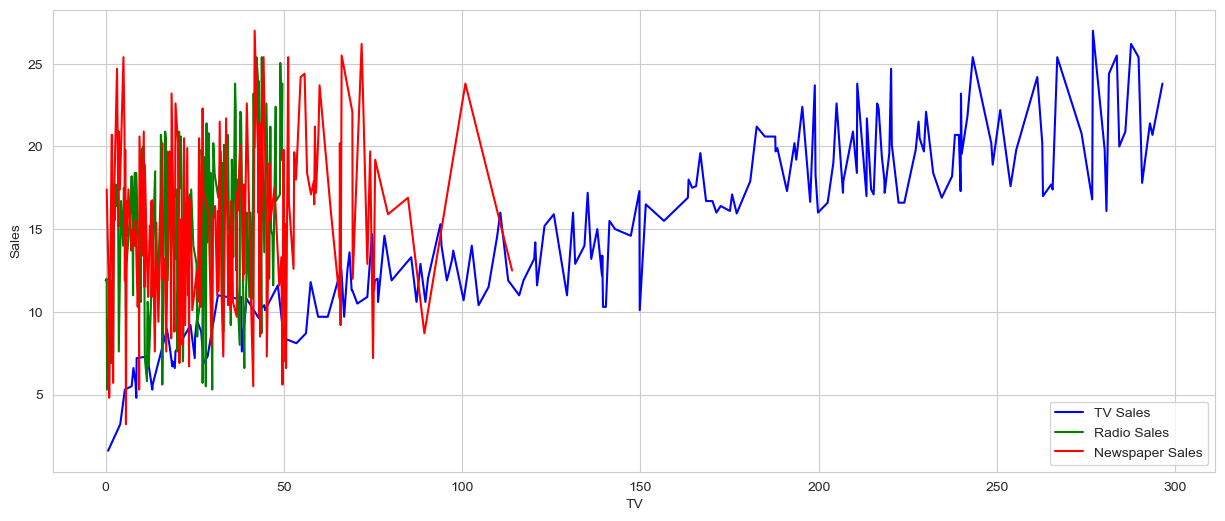

In [17]:
plt.figure(figsize=(15,6))
sns.lineplot(data=data,x='TV',y='Sales',errorbar=None,color='blue',label='TV Sales')
sns.lineplot(data=data,x='Radio',y='Sales',errorbar=None,color='green',label='Radio Sales')
sns.lineplot(data=data,x='Newspaper',y='Sales',errorbar=None,color='red',label='Newspaper Sales')

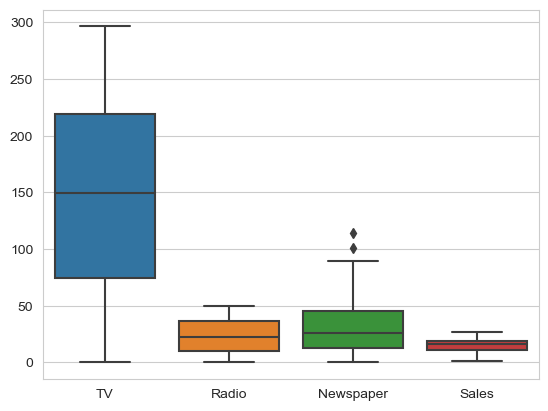

In [18]:
sns.boxplot(data=data)
plt.show()

In [19]:
data['Newspaper'].unique()

array([ 69.2,  45.1,  69.3,  58.5,  58.4,  75. ,  23.5,  11.6,   1. ,
        21.2,  24.2,   4. ,  65.9,   7.2,  46. ,  52.9, 114. ,  55.8,
        18.3,  19.1,  53.4,  49.6,  26.2,  19.5,  12.6,  22.9,  40.8,
        43.2,  38.6,  30. ,   0.3,   7.4,   8.5,   5. ,  45.7,  35.1,
        32. ,  31.6,  38.7,   1.8,  26.4,  43.3,  31.5,  35.7,  18.5,
        49.9,  36.8,  34.6,   3.6,  39.6,  58.7,  15.9,  60. ,  41.4,
        16.6,  37.7,   9.3,  21.4,  54.7,  27.3,   8.4,  28.9,   0.9,
         2.2,  10.2,  11. ,  27.2,  31.7,  19.3,  31.3,  13.1,  89.4,
        20.7,  14.2,   9.4,  23.1,  22.3,  36.9,  32.5,  35.6,  33.8,
        65.7,  16. ,  63.2,  73.4,  51.4,  33. ,  59. ,  72.3,  10.9,
         5.9,  22. ,  51.2,  45.9,  49.8, 100.9,  17.9,   5.3,  29.7,
        23.2,  25.6,   5.5,  56.5,   2.4,  10.7,  34.5,  52.7,  14.8,
        79.2,  46.2,  50.4,  15.6,  12.4,  74.2,  25.9,  50.6,   9.2,
         3.2,  43.1,   8.7,  43. ,   2.1,  65.6,  59.7,  20.5,   1.7,
        12.9,  75.6,

In [20]:
data = data[data['Newspaper'] <= 100]

outliers remove from Newspaper columns

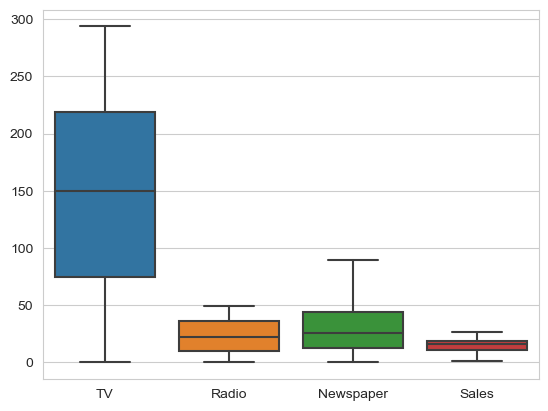

In [21]:
sns.boxplot(data=data)
plt.show()

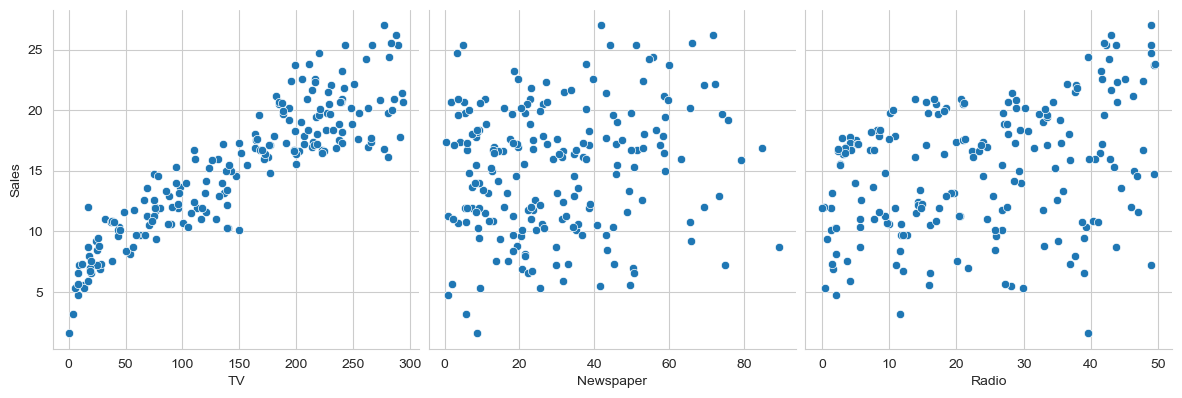

In [22]:
sns.pairplot(data, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

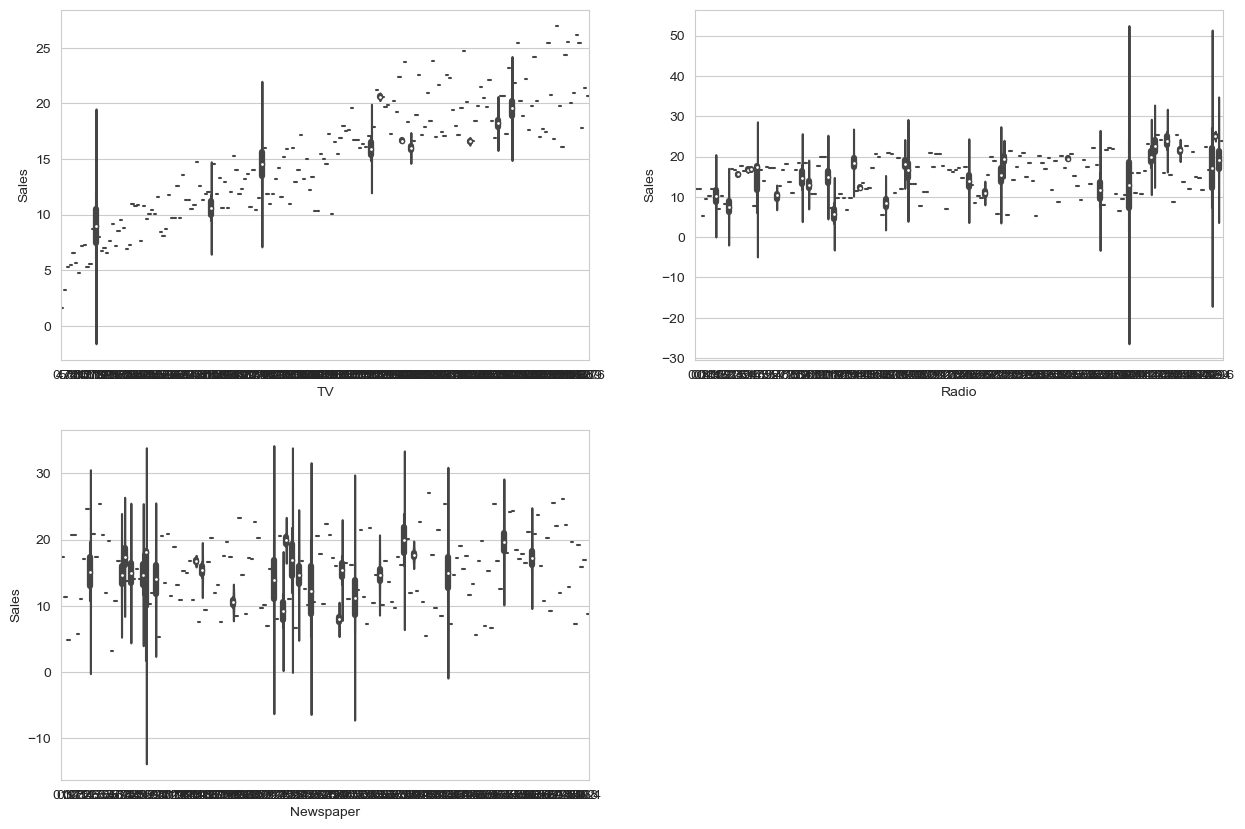

In [23]:
plt.figure(figsize=(15, 10))
plt.subplot(2,2,1)
sns.violinplot(x='TV', y='Sales', data=data)
plt.subplot(2,2,2)
sns.violinplot(x='Radio', y='Sales', data=data)
plt.subplot(2,2,3)
sns.violinplot(x='Newspaper', y='Sales', data=data)
plt.show()

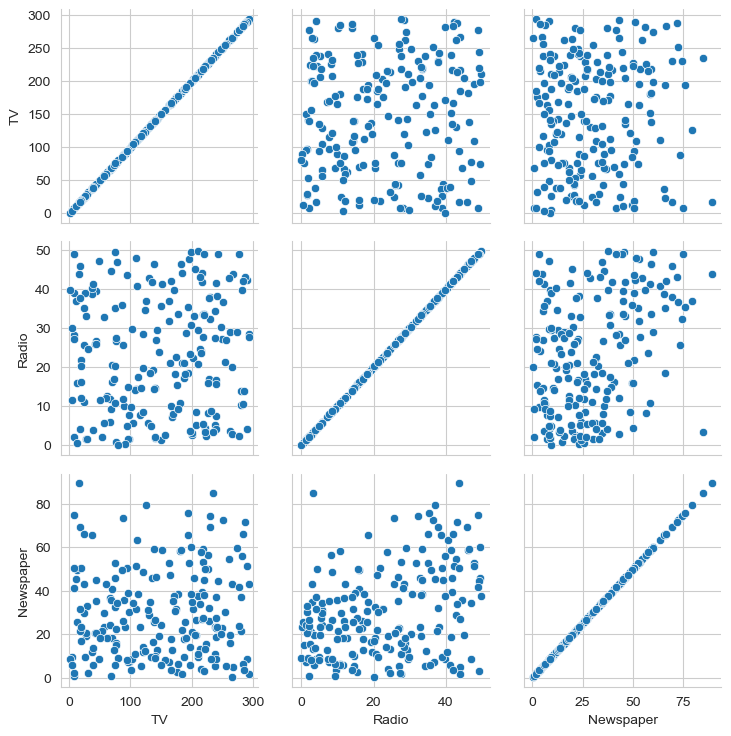

In [24]:
g = sns.PairGrid(data, vars=['TV', 'Radio', 'Newspaper'])
g.map(sns.scatterplot)
plt.show()

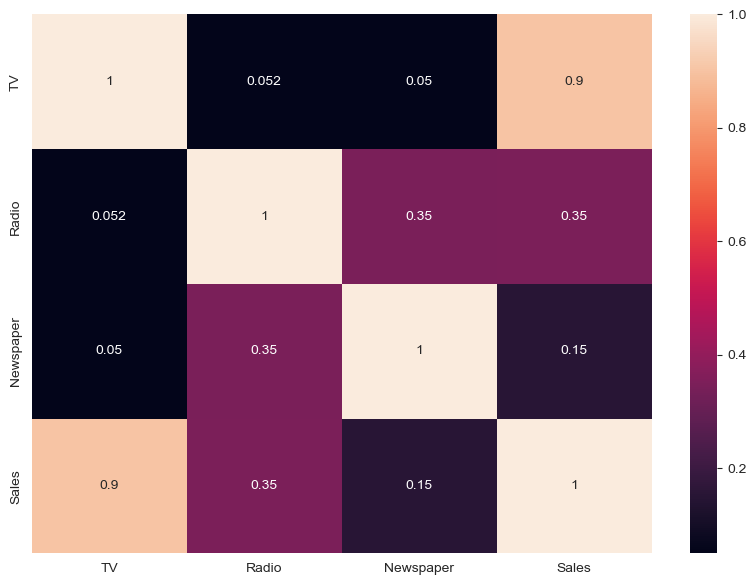

In [25]:
plt.figure(figsize=(10,7))
cor=data.corr()
sns.heatmap(cor,annot=True)
plt.show()

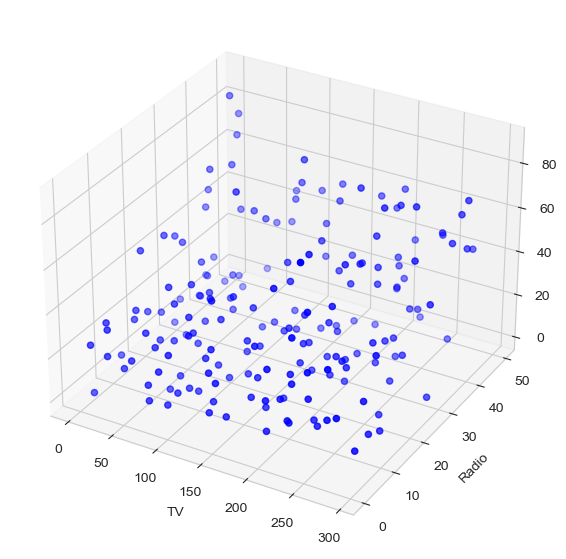

In [26]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data['TV'], data['Radio'], data['Newspaper'], c='blue', marker='o')
ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Newspaper')

plt.show()

### Model Building

In [27]:
x=data[['TV','Radio','Newspaper']]
y=data['Sales']

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Linear Regression

In [29]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [30]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [31]:
y_pred = model.predict(x_test)

In [32]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [33]:
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Absolute Error (MAE): 1.23
Mean Squared Error (MSE): 2.42
Root Mean Squared Error (RMSE): 1.55
R-squared (R²): 0.91


Random Forest Regression

In [34]:
from sklearn.ensemble import RandomForestRegressor
model2 = RandomForestRegressor(n_estimators=100)
model2.fit(x_train, y_train)
y_pred2 = model2.predict(x_test)

In [35]:
mae2 = mean_absolute_error(y_test, y_pred2)
mse2 = mean_squared_error(y_test, y_pred2)
rmse2 = np.sqrt(mse)
r22 = r2_score(y_test, y_pred2)

In [36]:
print(f"Mean Absolute Error (MAE): {mae2:.2f}")
print(f"Mean Squared Error (MSE): {mse2:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse2:.2f}")
print(f"R-squared (R²): {r22:.2f}")

Mean Absolute Error (MAE): 0.92
Mean Squared Error (MSE): 1.21
Root Mean Squared Error (RMSE): 1.55
R-squared (R²): 0.96


Support Vector Machine Regression

In [37]:
from sklearn.svm import SVR
model3 = SVR(kernel='linear')
model3.fit(x_train, y_train)
y_pred3 = model3.predict(x_test)

In [38]:
mae3 = mean_absolute_error(y_test, y_pred3)
mse3 = mean_squared_error(y_test, y_pred3)
rmse3 = np.sqrt(mse3)
r23 = r2_score(y_test, y_pred3)

In [39]:
print(f"Mean Absolute Error (MAE): {mae3:.2f}")
print(f"Mean Squared Error (MSE): {mse3:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse3:.2f}")
print(f"R-squared (R²): {r23:.2f}")

Mean Absolute Error (MAE): 1.24
Mean Squared Error (MSE): 2.55
Root Mean Squared Error (RMSE): 1.60
R-squared (R²): 0.91


Decision Tree Regression

In [40]:
from sklearn.tree import DecisionTreeRegressor
model4 = DecisionTreeRegressor()
model4.fit(x_train, y_train)
y_pred4 = model4.predict(x_test)

In [41]:
mae4 = mean_absolute_error(y_test, y_pred4)
mse4 = mean_squared_error(y_test, y_pred4)
rmse4 = np.sqrt(mse4)
r24 = r2_score(y_test, y_pred4)

In [42]:
print(f"Mean Absolute Error (MAE): {mae4:.2f}")
print(f"Mean Squared Error (MSE): {mse4:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse4:.2f}")
print(f"R-squared (R²): {r24:.2f}")

Mean Absolute Error (MAE): 1.17
Mean Squared Error (MSE): 2.21
Root Mean Squared Error (RMSE): 1.49
R-squared (R²): 0.92


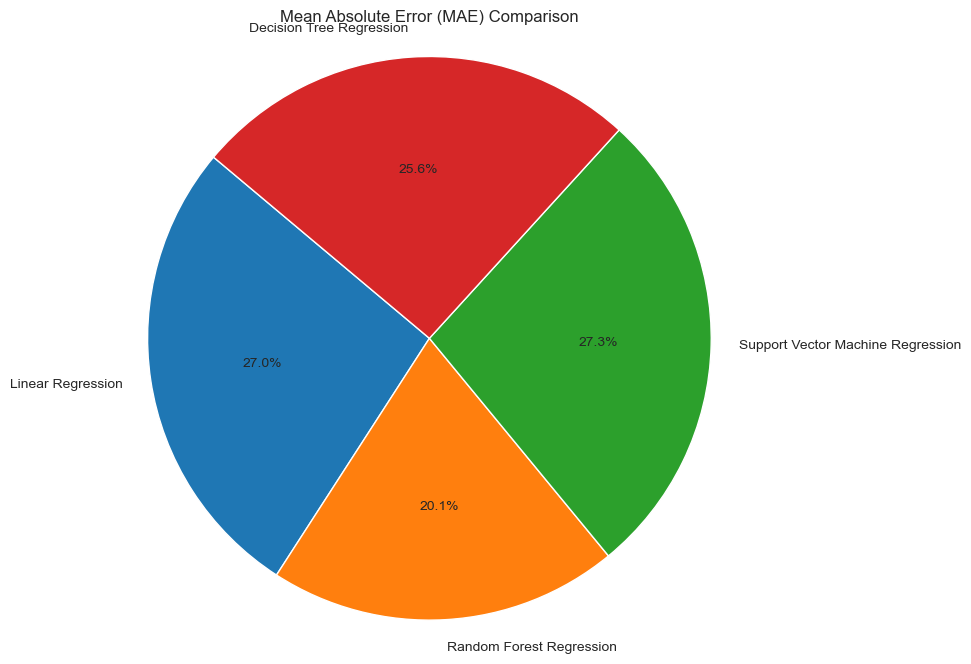

In [43]:
mae_values = [mae, mae2, mae3, mae4]
categories = ['Linear Regression', 'Random Forest Regression', 'Support Vector Machine Regression', 'Decision Tree Regression']
plt.figure(figsize=(8, 8))
plt.pie(mae_values, labels=categories, autopct='%1.1f%%', startangle=140)
plt.title('Mean Absolute Error (MAE) Comparison')
plt.axis('equal')  
plt.show()

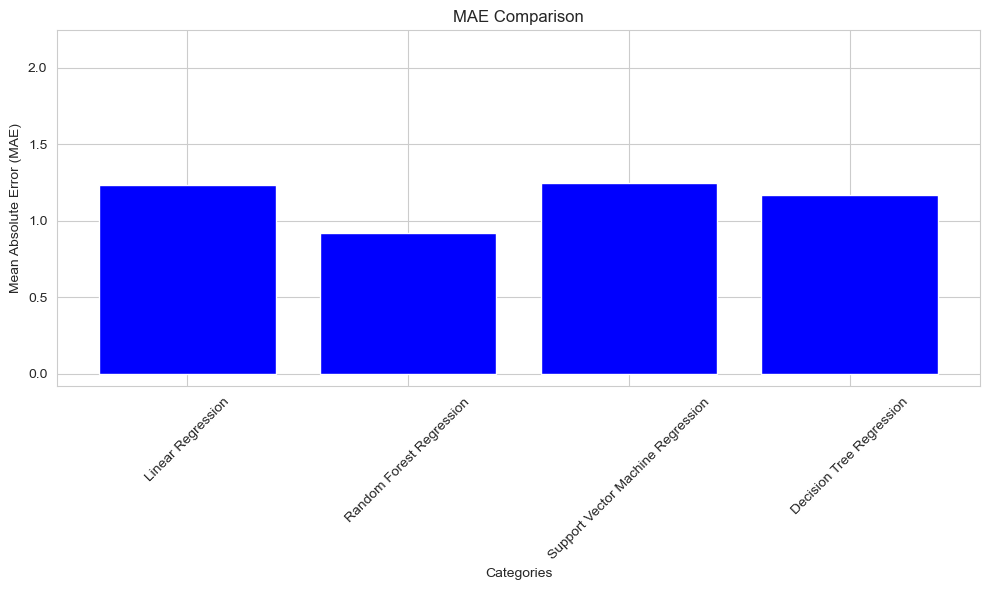

In [44]:
plt.figure(figsize=(10, 6))
plt.bar(categories, mae_values, color='blue')
plt.xlabel('Categories')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('MAE Comparison')
plt.ylim(min(mae_values) - 1, max(mae_values) + 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

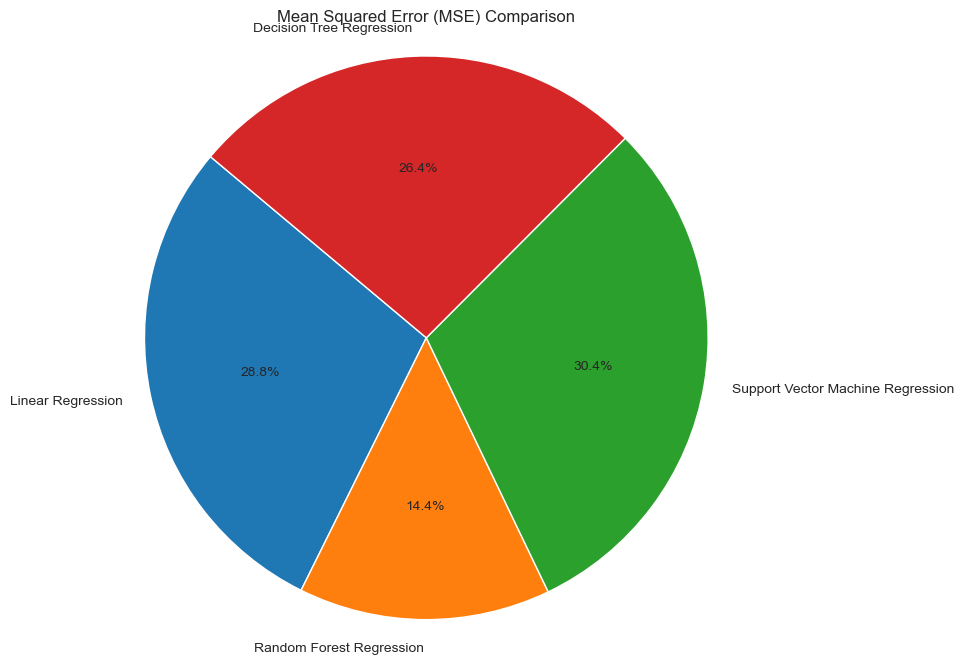

In [45]:
mse_values = [mse, mse2, mse3, mse4]
plt.figure(figsize=(8, 8))
plt.pie(mse_values, labels=categories, autopct='%1.1f%%', startangle=140)
plt.title('Mean Squared Error (MSE) Comparison')
plt.axis('equal')  
plt.show()

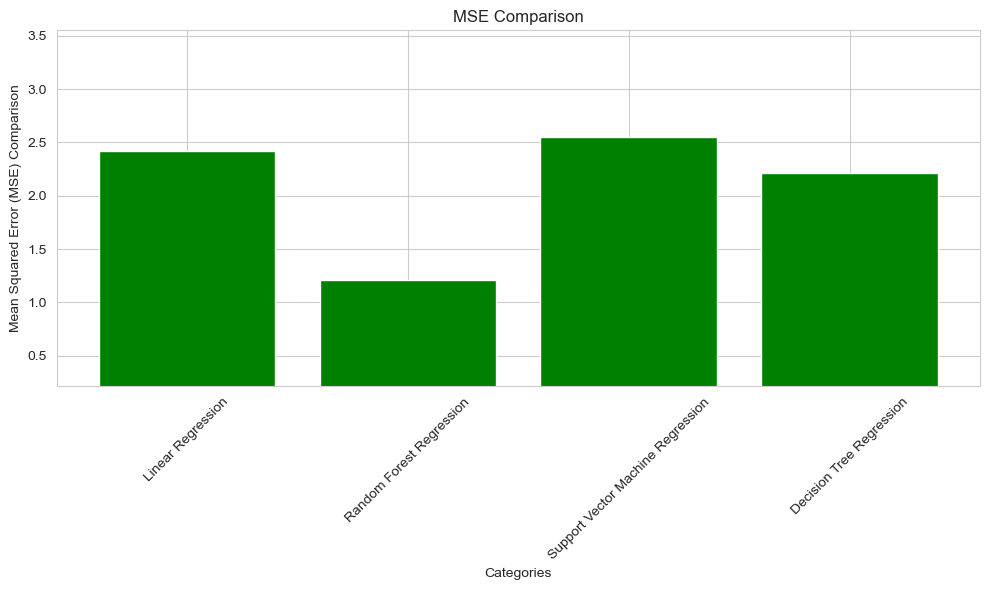

In [46]:
plt.figure(figsize=(10, 6))
plt.bar(categories, mse_values, color='green')
plt.xlabel('Categories')
plt.ylabel('Mean Squared Error (MSE) Comparison')
plt.title('MSE Comparison')
plt.ylim(min(mse_values) - 1, max(mse_values) + 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

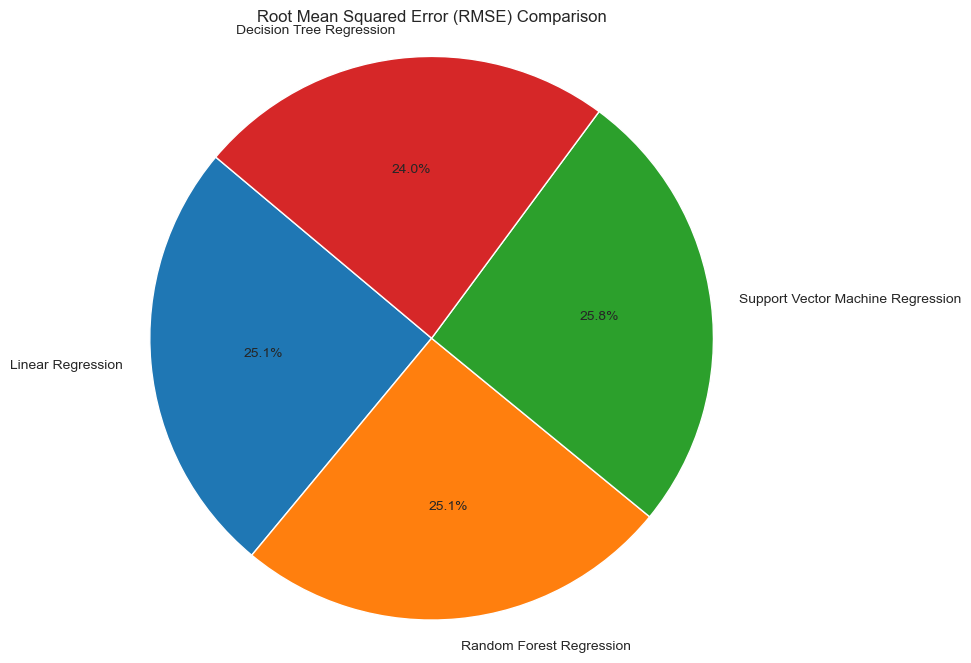

In [47]:
rmse_values = [rmse, rmse2, rmse3, rmse4]
plt.figure(figsize=(8, 8))
plt.pie(rmse_values, labels=categories, autopct='%1.1f%%', startangle=140)
plt.title('Root Mean Squared Error (RMSE) Comparison')
plt.axis('equal')  
plt.show()

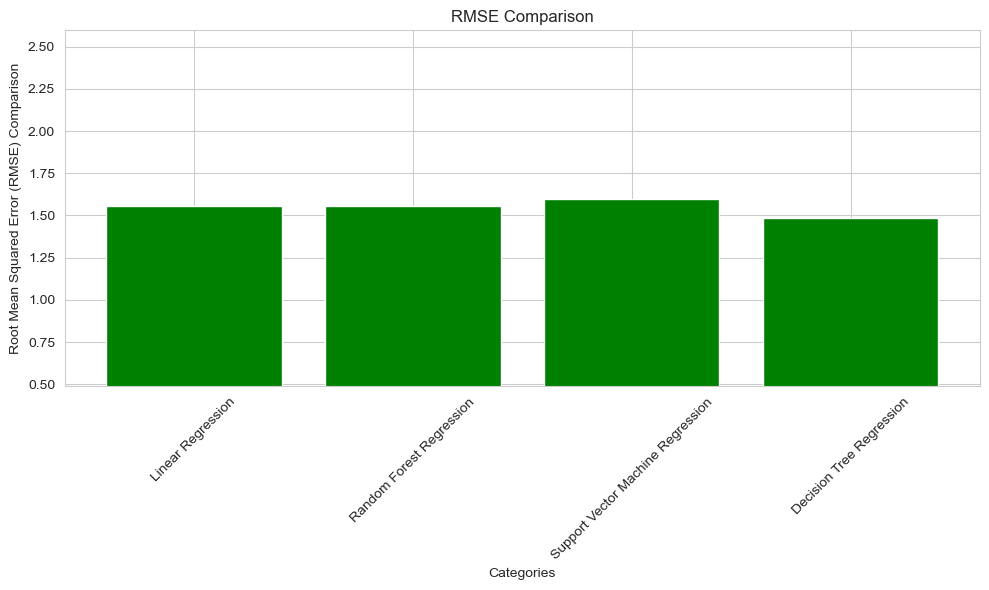

In [48]:
plt.figure(figsize=(10, 6))
plt.bar(categories, rmse_values, color='green')
plt.xlabel('Categories')
plt.ylabel('Root Mean Squared Error (RMSE) Comparison')
plt.title('RMSE Comparison')
plt.ylim(min(rmse_values) - 1, max(rmse_values) + 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

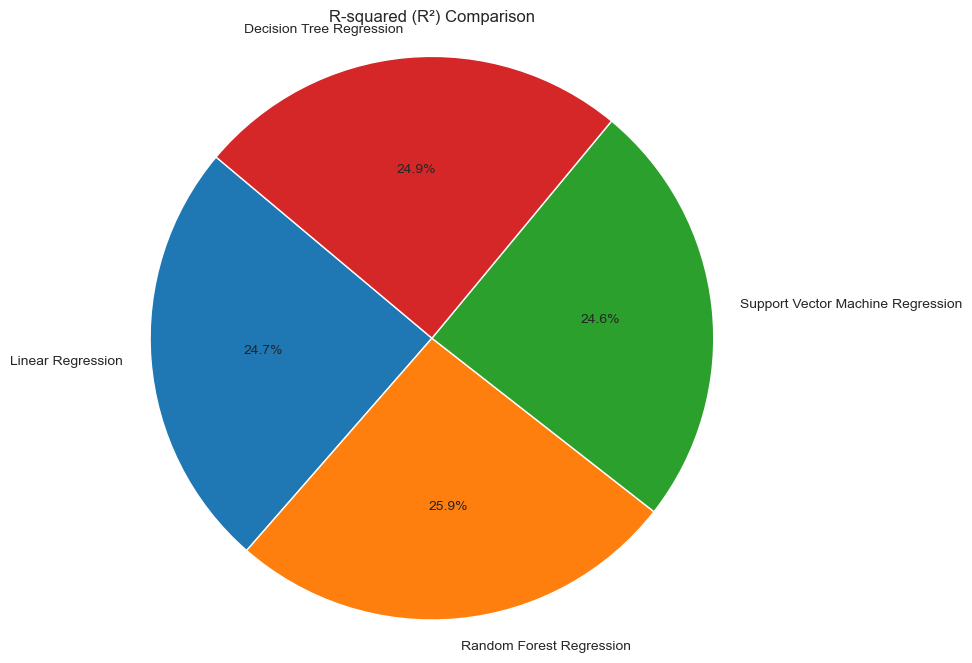

In [49]:
r2_values = [r2, r22, r23, r24]
plt.figure(figsize=(8, 8))
plt.pie(r2_values, labels=categories, autopct='%1.1f%%', startangle=140)
plt.title('R-squared (R²) Comparison')
plt.axis('equal')  
plt.show()

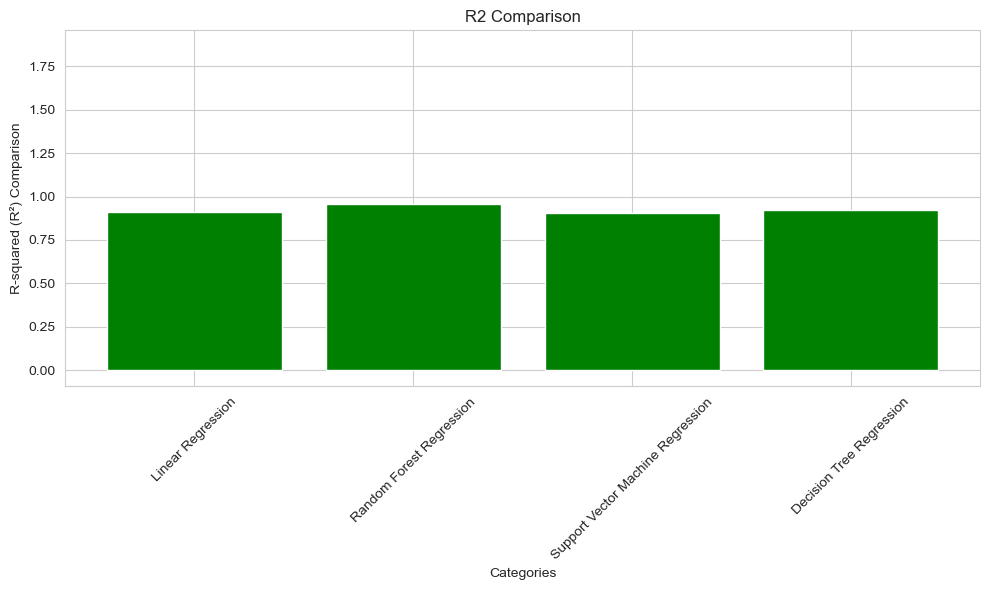

In [50]:
plt.figure(figsize=(10, 6))
plt.bar(categories, r2_values, color='green')
plt.xlabel('Categories')
plt.ylabel('R-squared (R²) Comparison')
plt.title('R2 Comparison')
plt.ylim(min(r2_values) - 1, max(r2_values) + 1)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### After analyzing the performance of different regression models, including Linear Regression, Random Forest Regression, Support Vector Machine Regression, and Decision Tree Regression, it is evident that Random Forest Regression consistently produces more accurate predictions and exhibits lower error rates compared to the other models. This conclusion is based on metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared (R²), which consistently show Random Forest Regression outperforming the alternatives. Random Forest Regression's ensemble approach, which combines multiple decision trees, enables it to capture complex relationships in the data, reduce overfitting, and provide robust predictions, making it the preferred choice for this regression task. 